<a href="https://colab.research.google.com/github/sowmyarshetty/Project2-AI-Class/blob/main/Project2_AI_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the data
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import  OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import gdown
from google.colab import drive
drive.mount('/content/drive')
# Import the accuracy_score function
from sklearn.metrics import accuracy_score


Mounted at /content/drive


## Load the lung_cancer_prediction_dataset from google drive using gdown

In [2]:
#URL for downloading lung cancer data
url_lc = 'https://drive.google.com/uc?id=1qQSYbhrUczPKIj22h0AC2f9rT4ljI3BC'
gdown.download(url_lc, 'lung_cancer_prediction_dataset.csv', quiet=False)


#Read the Lung cancer data.csv
df_lc = pd.read_csv(url_lc)
df_lc.head()


Downloading...
From: https://drive.google.com/uc?id=1qQSYbhrUczPKIj22h0AC2f9rT4ljI3BC
To: /content/lung_cancer_prediction_dataset.csv
100%|██████████| 23.5M/23.5M [00:00<00:00, 45.1MB/s]


,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,...,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80,Male,Yes,30,29,No,No,...,Low,Yes,No,Poor,No,NaN,Developing,690000,2.44,0.0
1,1,Iran,84,53,Male,No,0,0,Yes,No,...,Low,Yes,No,Poor,No,NaN,Developing,27000,2.10,0.0
2,2,Mexico,128,47,Male,Yes,12,6,Yes,No,...,Medium,No,No,Poor,Yes,NaN,Developing,28000,1.11,0.0
3,3,Indonesia,273,39,Female,No,0,0,No,Yes,...,Low,No,No,Poor,No,NaN,Developing,40000,0.75,0.0
4,4,South Africa,59,44,Female,No,0,0,Yes,No,...,Medium,Yes,No,Poor,No,NaN,Developing,15000,2.44,0.0


In [3]:
df_lc.dtypes

,0
ID,int64
Country,object
Population_Size,int64
Age,int64
Gender,object
Smoker,object
Years_of_Smoking,int64
Cigarettes_per_Day,int64
Passive_Smoker,object
Family_History,object


In [4]:
df_lc.columns


Index(['ID', 'Country', 'Population_Size', 'Age', 'Gender', 'Smoker',
       'Years_of_Smoking', 'Cigarettes_per_Day', 'Passive_Smoker',
       'Family_History', 'Lung_Cancer_Diagnosis', 'Cancer_Stage',
       'Survival_Years', 'Adenocarcinoma_Type', 'Air_Pollution_Exposure',
       'Occupational_Exposure', 'Indoor_Pollution', 'Healthcare_Access',
       'Early_Detection', 'Treatment_Type', 'Developed_or_Developing',
       'Annual_Lung_Cancer_Deaths', 'Lung_Cancer_Prevalence_Rate',
       'Mortality_Rate'],
      dtype='object')

#Exploratory Data Analysis


In [5]:
# Display Basic Information
print("Dataset Shape:", df_lc.shape)
print("\nData Types:\n", df_lc.dtypes)
print("\nMissing Values:\n", df_lc.isnull().sum())
print("\nBasic Statistics:\n", df_lc.describe())

Dataset Shape: (220632, 24)

Data Types:
 ID                               int64
Country                         object
Population_Size                  int64
Age                              int64
Gender                          object
Smoker                          object
Years_of_Smoking                 int64
Cigarettes_per_Day               int64
Passive_Smoker                  object
Family_History                  object
Lung_Cancer_Diagnosis           object
Cancer_Stage                    object
Survival_Years                   int64
Adenocarcinoma_Type             object
Air_Pollution_Exposure          object
Occupational_Exposure           object
Indoor_Pollution                object
Healthcare_Access               object
Early_Detection                 object
Treatment_Type                  object
Developed_or_Developing         object
Annual_Lung_Cancer_Deaths        int64
Lung_Cancer_Prevalence_Rate    float64
Mortality_Rate                 float64
dtype: object

Missing

# Distribution of Target Variable (Lung Cancer Diagnosis)

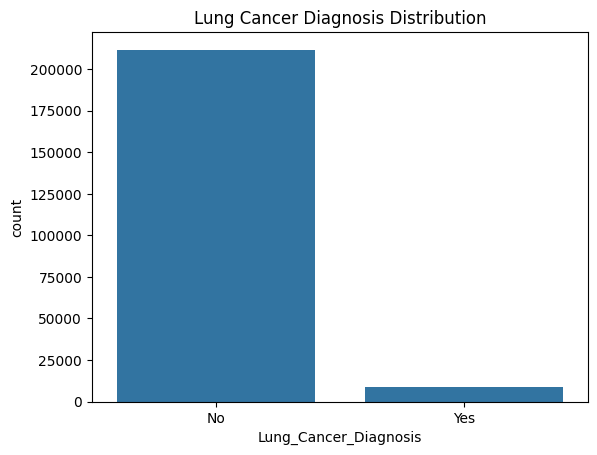

In [50]:
# Distribution of Target Variable (Lung Cancer Diagnosis)
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df_lc['Lung_Cancer_Diagnosis'])
plt.title("Lung Cancer Diagnosis Distribution")
plt.show()

# Age Distribution

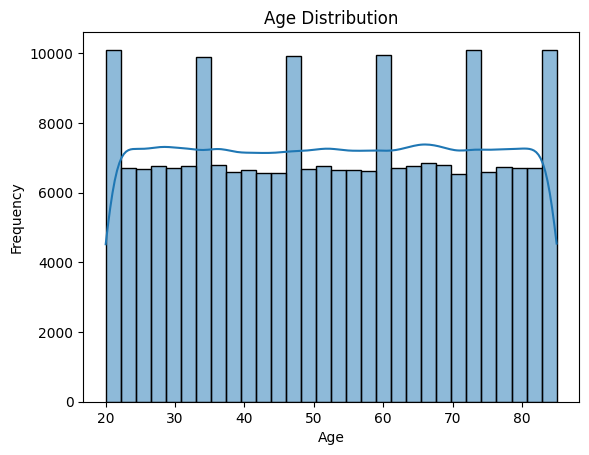

In [52]:
# Age Distribution
sns.histplot(df_lc['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Correlation Heatmap for Numeric Features

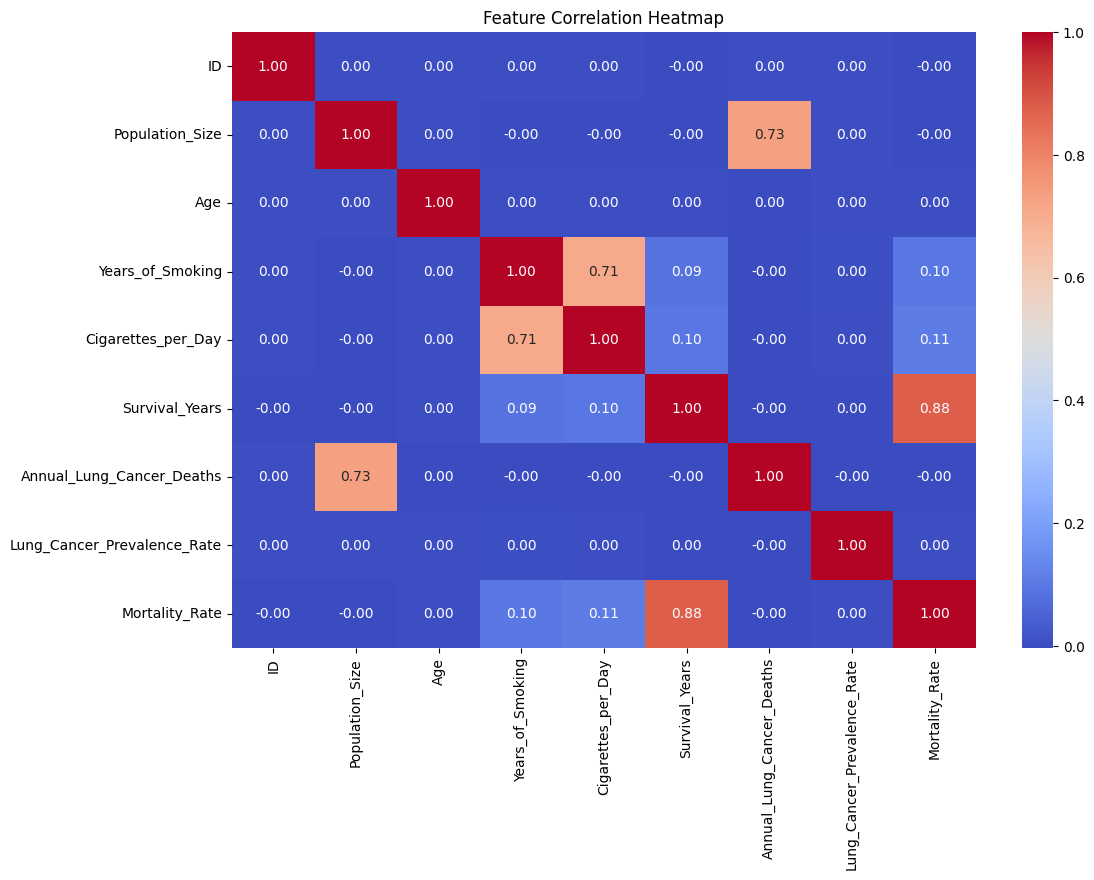

In [53]:
# Correlation Heatmap for Numeric Features
plt.figure(figsize=(12, 8))
sns.heatmap(df_lc.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplot for Smoking vs. Lung Cancer Diagnosis

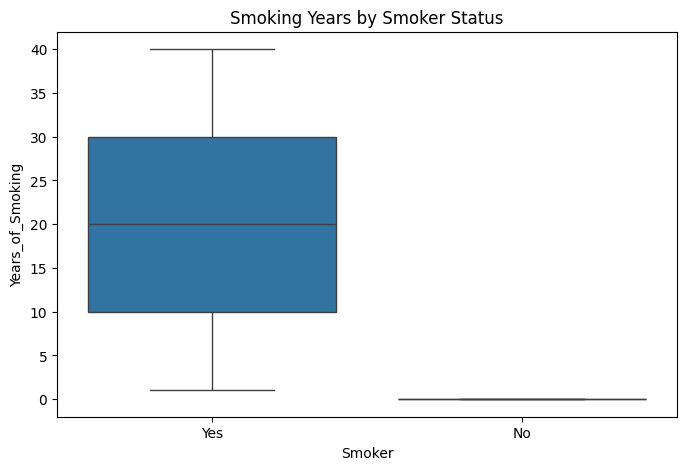

In [54]:
# Boxplot for Smoking vs. Lung Cancer Diagnosis
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_lc['Smoker'], y=df_lc['Years_of_Smoking'])
plt.title("Smoking Years by Smoker Status")
plt.show()


# Pairplot for Selected Features

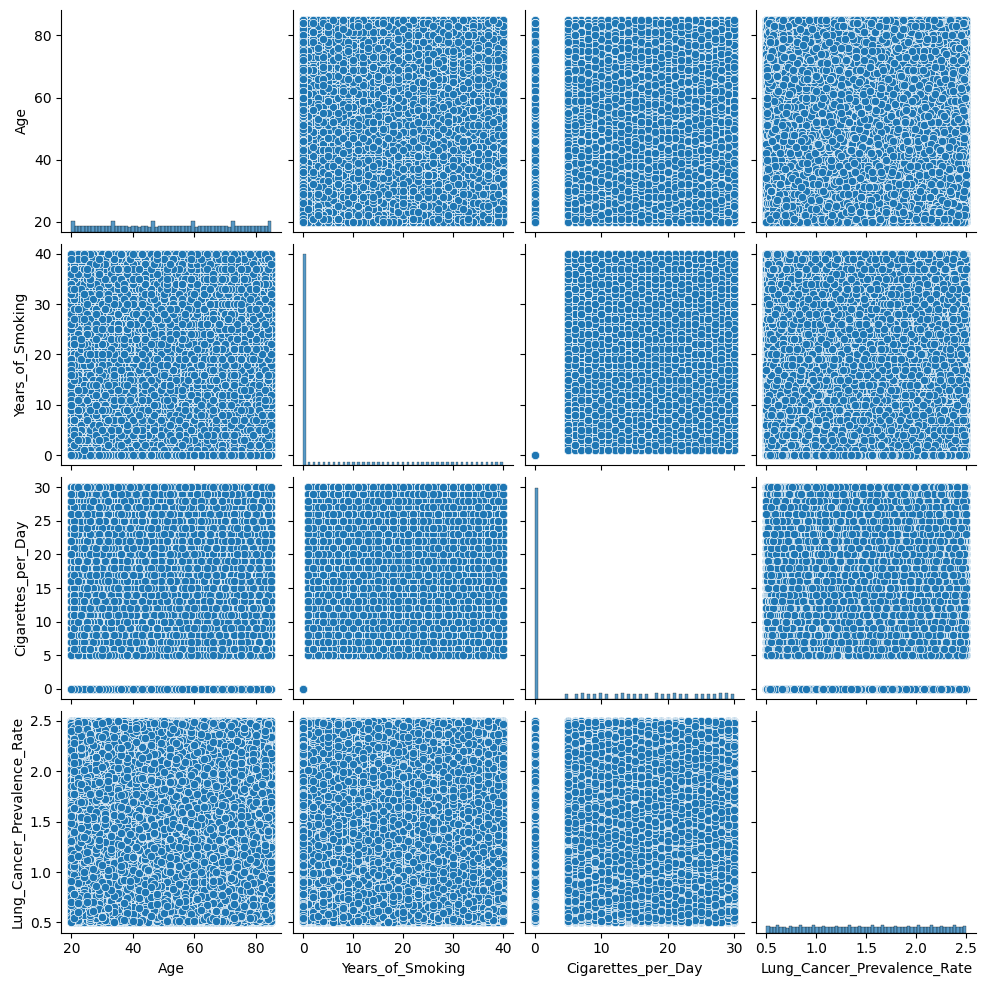

In [56]:

# Pairplot for Selected Features
selected_features = ['Age', 'Years_of_Smoking', 'Cigarettes_per_Day', 'Lung_Cancer_Prevalence_Rate']
sns.pairplot(df_lc[selected_features])
plt.show()

In [6]:
df_lc_array = StandardScaler().fit_transform(df_lc[['Population_Size','Age','Years_of_Smoking','Cigarettes_per_Day','Survival_Years','Annual_Lung_Cancer_Deaths','Lung_Cancer_Prevalence_Rate','Mortality_Rate']])

df_lc_scaled = pd.DataFrame(df_lc_array,columns =[['Population_Size','Age','Years_of_Smoking','Cigarettes_per_Day','Survival_Years','Annual_Lung_Cancer_Deaths','Lung_Cancer_Prevalence_Rate','Mortality_Rate']])
df_lc_scaled.head(5)



,Population_Size,Age,Years_of_Smoking,Cigarettes_per_Day,Survival_Years,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,3.350698,1.440476,1.763298,2.243636,-0.181578,4.790494,1.622573,-0.204354
1,-0.417412,0.025246,-0.660510,-0.714895,-0.181578,-0.282586,1.034380,-0.204354
2,-0.291427,-0.289250,0.309013,-0.102785,-0.181578,-0.274934,-0.678299,-0.204354
3,0.123752,-0.708577,-0.660510,-0.714895,-0.181578,-0.183114,-1.301092,-0.204354
4,-0.488995,-0.446497,-0.660510,-0.714895,-0.181578,-0.374406,1.622573,-0.204354


In [7]:
# Transform the country, gender column using get_dummies()

df_categorical_data = pd.get_dummies(df_lc[['Country','Gender','Smoker','Passive_Smoker','Family_History', 'Lung_Cancer_Diagnosis', 'Cancer_Stage','Adenocarcinoma_Type', 'Air_Pollution_Exposure','Occupational_Exposure', 'Indoor_Pollution', 'Healthcare_Access']])

df_categorical_data.head(5)


,Country_Bangladesh,Country_Brazil,Country_China,Country_DR Congo,Country_Egypt,Country_Ethiopia,Country_France,Country_Germany,Country_India,Country_Indonesia,...,Adenocarcinoma_Type_Yes,Air_Pollution_Exposure_High,Air_Pollution_Exposure_Low,Air_Pollution_Exposure_Medium,Occupational_Exposure_No,Occupational_Exposure_Yes,Indoor_Pollution_No,Indoor_Pollution_Yes,Healthcare_Access_Good,Healthcare_Access_Poor
0,False,False,True,False,False,False,False,False,False,False,...,True,False,True,False,False,True,True,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,True,True,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,False,True,False,False,True
3,False,False,False,False,False,False,False,False,False,True,...,True,False,True,False,True,False,True,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,True,True,False,False,True


In [8]:
# Concatenate the df_lc_scaled and the df_categorical_data DataFrames

# Change the column names of df_lc_scaled to strings
df_lc_scaled.columns = df_lc_scaled.columns.get_level_values(0)

df_lc_concat = pd.concat([df_lc_scaled,df_categorical_data],axis = 1)
df_lc_concat.head(5)


,Population_Size,Age,Years_of_Smoking,Cigarettes_per_Day,Survival_Years,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate,Country_Bangladesh,Country_Brazil,...,Adenocarcinoma_Type_Yes,Air_Pollution_Exposure_High,Air_Pollution_Exposure_Low,Air_Pollution_Exposure_Medium,Occupational_Exposure_No,Occupational_Exposure_Yes,Indoor_Pollution_No,Indoor_Pollution_Yes,Healthcare_Access_Good,Healthcare_Access_Poor
0,3.350698,1.440476,1.763298,2.243636,-0.181578,4.790494,1.622573,-0.204354,False,False,...,True,False,True,False,False,True,True,False,False,True
1,-0.417412,0.025246,-0.660510,-0.714895,-0.181578,-0.282586,1.034380,-0.204354,False,False,...,True,False,True,False,False,True,True,False,False,True
2,-0.291427,-0.289250,0.309013,-0.102785,-0.181578,-0.274934,-0.678299,-0.204354,False,False,...,True,False,False,True,True,False,True,False,False,True
3,0.123752,-0.708577,-0.660510,-0.714895,-0.181578,-0.183114,-1.301092,-0.204354,False,False,...,True,False,True,False,True,False,True,False,False,True
4,-0.488995,-0.446497,-0.660510,-0.714895,-0.181578,-0.374406,1.622573,-0.204354,False,False,...,True,False,False,True,False,True,True,False,False,True


In [9]:
# Create a a list to store inertia values
inertia = []

# Create a a list to store the values of k
k = list(range(1, 11))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(df_lc_concat)
    inertia.append(k_model.inertia_)


In [10]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,2.856694e+06
1,2,2.529327e+06
2,3,2.031585e+06
3,4,1.738743e+06
4,5,1.875111e+06


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

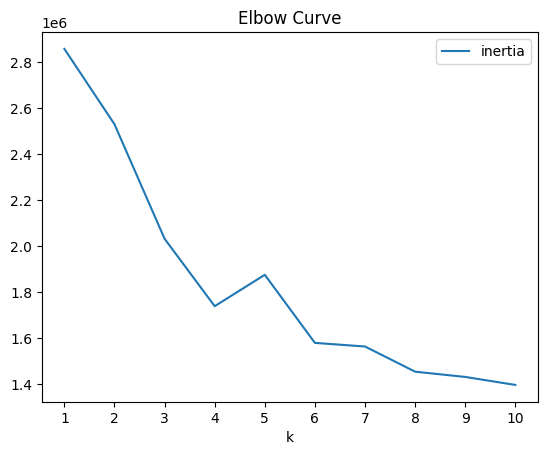

In [11]:
# Plot the elbow curve
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

#Use Kmeans to cluster the data

In [12]:
# Define the model with 4 clusters
model = KMeans(n_clusters=4, n_init='auto', random_state=0)

# Fit the model
model.fit(df_lc_concat)

# Make predictions
k_4 = model.predict(df_lc_concat)

# Create a copy of the preprocessed data
predictions_df = df_lc_concat.copy()

# Add a class column with the labels
predictions_df['class'] = k_4

<Axes: xlabel='Age', ylabel='Years_of_Smoking'>

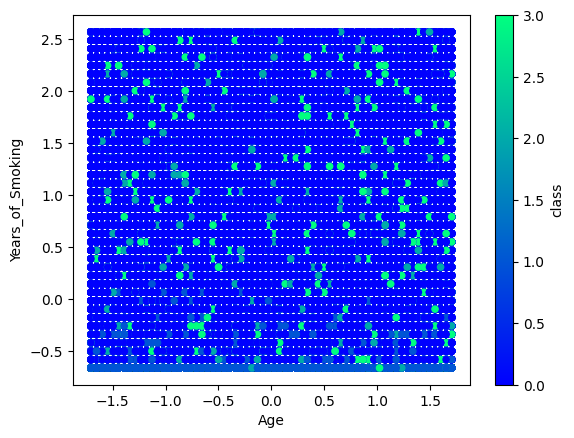

In [13]:
# Plot the clusters

# Plot the clusters
predictions_df.plot.scatter(
    x="Age",
    y="Years_of_Smoking",
    c="class",
    colormap="winter")



#Classification

*   Logistic Regression




In [14]:
df_lc.head(5)

df_lc_reg = df_lc.copy()
df_lc_reg.head(5)

,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,...,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80,Male,Yes,30,29,No,No,...,Low,Yes,No,Poor,No,NaN,Developing,690000,2.44,0.0
1,1,Iran,84,53,Male,No,0,0,Yes,No,...,Low,Yes,No,Poor,No,NaN,Developing,27000,2.10,0.0
2,2,Mexico,128,47,Male,Yes,12,6,Yes,No,...,Medium,No,No,Poor,Yes,NaN,Developing,28000,1.11,0.0
3,3,Indonesia,273,39,Female,No,0,0,No,Yes,...,Low,No,No,Poor,No,NaN,Developing,40000,0.75,0.0
4,4,South Africa,59,44,Female,No,0,0,Yes,No,...,Medium,Yes,No,Poor,No,NaN,Developing,15000,2.44,0.0


# Data Pre-processing.


*   Used OneHotEncoder for all categorical data
*   One hot encoding creates new dummy features for each category with 0 and 1 values






In [15]:
# OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder()
# Default output is sparse matrix
enc = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
enc.set_output(transform="pandas")

columns_to_encode = ['Country','Gender','Smoker','Passive_Smoker','Family_History', 'Lung_Cancer_Diagnosis', 'Cancer_Stage','Adenocarcinoma_Type', 'Air_Pollution_Exposure','Occupational_Exposure', 'Indoor_Pollution', 'Healthcare_Access']

# Fit the encoder to the data
enc.fit(df_lc_reg[columns_to_encode])

# Transform the data
lc_data_ohe = enc.transform(df_lc_reg[columns_to_encode])

lc_data_ohe.head()

,Country_Bangladesh,Country_Brazil,Country_China,Country_DR Congo,Country_Egypt,Country_Ethiopia,Country_France,Country_Germany,Country_India,Country_Indonesia,...,Adenocarcinoma_Type_Yes,Air_Pollution_Exposure_High,Air_Pollution_Exposure_Low,Air_Pollution_Exposure_Medium,Occupational_Exposure_No,Occupational_Exposure_Yes,Indoor_Pollution_No,Indoor_Pollution_Yes,Healthcare_Access_Good,Healthcare_Access_Poor
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [16]:
# get all columns with numeric data
df_lc_numeric_data = df_lc_reg[['Population_Size','Age','Years_of_Smoking','Cigarettes_per_Day','Survival_Years','Annual_Lung_Cancer_Deaths','Lung_Cancer_Prevalence_Rate','Mortality_Rate']]

df_lc_numeric_data.head(5)

,Population_Size,Age,Years_of_Smoking,Cigarettes_per_Day,Survival_Years,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,1400,80,30,29,0,690000,2.44,0.0
1,84,53,0,0,0,27000,2.10,0.0
2,128,47,12,6,0,28000,1.11,0.0
3,273,39,0,0,0,40000,0.75,0.0
4,59,44,0,0,0,15000,2.44,0.0


In [17]:
df_concat_lc_classification = pd.concat([df_lc_numeric_data,lc_data_ohe],axis=1)
df_concat_lc_classification.head(5)

,Population_Size,Age,Years_of_Smoking,Cigarettes_per_Day,Survival_Years,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate,Country_Bangladesh,Country_Brazil,...,Adenocarcinoma_Type_Yes,Air_Pollution_Exposure_High,Air_Pollution_Exposure_Low,Air_Pollution_Exposure_Medium,Occupational_Exposure_No,Occupational_Exposure_Yes,Indoor_Pollution_No,Indoor_Pollution_Yes,Healthcare_Access_Good,Healthcare_Access_Poor
0,1400,80,30,29,0,690000,2.44,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,84,53,0,0,0,27000,2.10,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,128,47,12,6,0,28000,1.11,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,273,39,0,0,0,40000,0.75,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,59,44,0,0,0,15000,2.44,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [18]:
df_classification =  df_concat_lc_classification.copy()
df_classification.head(5)

,Population_Size,Age,Years_of_Smoking,Cigarettes_per_Day,Survival_Years,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate,Country_Bangladesh,Country_Brazil,...,Adenocarcinoma_Type_Yes,Air_Pollution_Exposure_High,Air_Pollution_Exposure_Low,Air_Pollution_Exposure_Medium,Occupational_Exposure_No,Occupational_Exposure_Yes,Indoor_Pollution_No,Indoor_Pollution_Yes,Healthcare_Access_Good,Healthcare_Access_Poor
0,1400,80,30,29,0,690000,2.44,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,84,53,0,0,0,27000,2.10,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,128,47,12,6,0,28000,1.11,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,273,39,0,0,0,40000,0.75,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,59,44,0,0,0,15000,2.44,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [19]:
df_classification.columns

X = df_classification.drop(columns=['Lung_Cancer_Diagnosis_No','Lung_Cancer_Diagnosis_Yes'])
X.head()

,Population_Size,Age,Years_of_Smoking,Cigarettes_per_Day,Survival_Years,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate,Country_Bangladesh,Country_Brazil,...,Adenocarcinoma_Type_Yes,Air_Pollution_Exposure_High,Air_Pollution_Exposure_Low,Air_Pollution_Exposure_Medium,Occupational_Exposure_No,Occupational_Exposure_Yes,Indoor_Pollution_No,Indoor_Pollution_Yes,Healthcare_Access_Good,Healthcare_Access_Poor
0,1400,80,30,29,0,690000,2.44,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,84,53,0,0,0,27000,2.10,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,128,47,12,6,0,28000,1.11,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,273,39,0,0,0,40000,0.75,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,59,44,0,0,0,15000,2.44,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [20]:
y = df_classification["Lung_Cancer_Diagnosis_Yes"]
y.head()

,Lung_Cancer_Diagnosis_Yes
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [21]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
X_train

,Population_Size,Age,Years_of_Smoking,Cigarettes_per_Day,Survival_Years,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate,Country_Bangladesh,Country_Brazil,...,Adenocarcinoma_Type_Yes,Air_Pollution_Exposure_High,Air_Pollution_Exposure_Low,Air_Pollution_Exposure_Medium,Occupational_Exposure_No,Occupational_Exposure_Yes,Indoor_Pollution_No,Indoor_Pollution_Yes,Healthcare_Access_Good,Healthcare_Access_Poor
136839,128,66,32,8,0,28000,2.27,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
17238,84,44,13,12,0,27000,2.47,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
123835,60,36,0,0,0,31000,1.46,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
20658,70,73,0,0,0,26000,0.66,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
29885,95,57,6,27,0,17000,1.25,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,273,73,2,10,0,40000,2.11,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
103694,331,56,33,9,0,130000,0.76,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
131932,59,80,0,0,0,15000,1.28,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
146867,84,42,0,0,0,27000,2.06,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [23]:
X_test

,Population_Size,Age,Years_of_Smoking,Cigarettes_per_Day,Survival_Years,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate,Country_Bangladesh,Country_Brazil,...,Adenocarcinoma_Type_Yes,Air_Pollution_Exposure_High,Air_Pollution_Exposure_Low,Air_Pollution_Exposure_Medium,Occupational_Exposure_No,Occupational_Exposure_Yes,Indoor_Pollution_No,Indoor_Pollution_Yes,Healthcare_Access_Good,Healthcare_Access_Poor
68636,97,73,0,0,0,22000,1.07,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
12927,128,51,0,0,0,28000,2.47,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
41413,85,33,15,14,0,29000,0.91,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
97642,206,72,0,0,0,20000,2.41,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
12531,85,24,0,0,0,29000,0.81,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74987,331,33,0,0,0,130000,0.88,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
116394,60,60,18,6,0,31000,1.07,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
162278,102,36,0,0,0,24000,1.61,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
134580,54,77,37,24,0,44581,1.35,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


# Use StandardScaler for trainingdata

In [24]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.29216707,  0.70726974,  1.92455755, ..., -0.54854941,
        -0.49887797,  0.49887797],
       [-0.41788519, -0.44596587,  0.38967958, ..., -0.54854941,
        -0.49887797,  0.49887797],
       [-0.48645871, -0.86532427, -0.66050008, ...,  1.82298984,
        -0.49887797,  0.49887797],
       ...,
       [-0.48931594,  1.44114694, -0.66050008, ...,  1.82298984,
        -0.49887797,  0.49887797],
       [-0.41788519, -0.55080547, -0.66050008, ...,  1.82298984,
        -0.49887797,  0.49887797],
       [-0.31502491,  1.65082614, -0.66050008, ..., -0.54854941,
        -0.49887797,  0.49887797]])

In [25]:
# Transform the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.3807412 ,  1.07420834, -0.66050008, ..., -0.54854941,
        -0.49887797,  0.49887797],
       [-0.29216707, -0.07902727, -0.66050008, ..., -0.54854941,
        -0.49887797,  0.49887797],
       [-0.41502796, -1.02258367,  0.55124568, ..., -0.54854941,
        -0.49887797,  0.49887797],
       ...,
       [-0.36645505, -0.86532427, -0.66050008, ..., -0.54854941,
        -0.49887797,  0.49887797],
       [-0.50360209,  1.28388754,  2.32847281, ..., -0.54854941,
        -0.49887797,  0.49887797],
       [-0.18359233, -1.49436187, -0.66050008, ..., -0.54854941,
        -0.49887797,  0.49887797]])

In [26]:
# Check the max and min of the scaled training and testing sets
print("Scaled data min/max (StandardScaler):")
print("Training data min:",X_train_scaled.min())
print("Training data max:",X_train_scaled.max())
print("Testing data min:",X_test_scaled.min())
print("Testing data max:",X_test_scaled.max())

Scaled data min/max (StandardScaler):
Training data min: -4.868019303607833
Training data max: 9.967351190329577
Testing data min: -4.868019303607833
Testing data max: 9.967351190329577


# Use LogisticRegression Model

In [27]:
# Import `LogisticRegression` from sklearn
from sklearn.linear_model import LogisticRegression

In [28]:
logistic_regression_model = LogisticRegression()


In [29]:
#Fit the model with raw data X_train
logistic_regression_model1 = LogisticRegression()
logistic_regression_model1.fit(X_train, y_train)

# Score the model
print(f"Training Data Score: {logistic_regression_model1.score(X_train, y_train)}")
print(f"Testing Data Score: {logistic_regression_model1.score(X_test, y_test)}")


Training Data Score: 1.0
Testing Data Score: 1.0


In [30]:
# Fit the model
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [31]:
# Score the model
print(f"Training Data Score: {logistic_regression_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {logistic_regression_model.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 1.0


In [32]:
# Apply the fitted model to the `test` dataset
testing_predictions = logistic_regression_model.predict(X_test)

# Save both the test predictions and actual test values to a DataFrame
results_df = pd.DataFrame({
    "Testing Data Predictions": testing_predictions,
    "Testing Data Actual Targets": y_test})

results_df.tail(5)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Testing Data Predictions,Testing Data Actual Targets
74987,0.0,0.0
116394,0.0,0.0
162278,0.0,0.0
134580,0.0,0.0
25291,0.0,0.0


#Accuracy Score using Logistic Regression Model   

In [33]:


# Calculate the model's accuracy on the test dataset
accuracy_score(y_test, testing_predictions)


0.9643569382501178

# Using Support Vector Machine classifier model

In [34]:
from sklearn.svm import SVC

In [35]:
# Create the support vector machine classifier model with a 'linear' kernel
svcmodel = SVC(kernel='linear')

In [36]:
# Fit the model to the training data
svcmodel.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [37]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % svcmodel.score(X_train_scaled, y_train))
print('Test Accuracy: %.3f' % svcmodel.score(X_test_scaled, y_test))

Train Accuracy: 1.000
Test Accuracy: 1.000


# Predicting the Testing Labels using SVM classifer model

In [38]:
# Make and save testing predictions with the saved SVM model using the testing data
svctesting_predictions = svcmodel.predict(X_test_scaled)

# Review the predictions
svctesting_predictions

array([0., 0., 0., ..., 0., 0., 0.])

# Accuracy score using the SVM classifer model

In [39]:
# Display the accuracy score for the testing dataset
accuracy_score(y_test, svctesting_predictions)

1.0

# Using Decision Tree Model

In [40]:
# Create the decision tree classifier instance
from sklearn import tree
dtmodel = tree.DecisionTreeClassifier()

In [41]:
# Fit the model
dtmodel = dtmodel.fit(X_train_scaled, y_train)

# Making predictions using the Decision Tree Model


In [42]:
dtpredictions = dtmodel.predict(X_test_scaled)

# Decision Tree Model Evaluation

In [43]:
# Calculate the accuracy score
acc_score = accuracy_score(y_test, dtpredictions)

print(f"Decision Tree Model Accuracy Score : {acc_score}")

Decision Tree Model Accuracy Score : 1.0


#Visualizing the Decision Tree

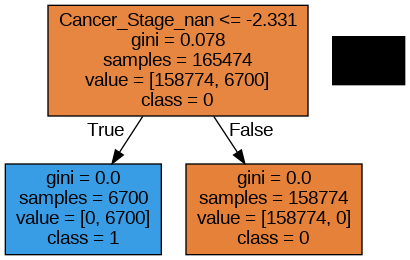

In [44]:
# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

# Create DOT data
dot_data = tree.export_graphviz(
    dtmodel, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True, max_depth=5
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

#Use Random Forest Model


In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)


In [46]:
# Evaluate the model
print(f'Training Score: {rf_model.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rf_model.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 1.0


#Making predictions using the Random Forest Model

In [47]:
# Make predictions using the testing data
predictions = rf_model.predict(X_test)
# Calculate the accuracy score
rfmacc_score = accuracy_score(y_test, predictions)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# Accuracy Score using the Random Forest Model

In [48]:
# Display results
print(f"Random Forest Model Accuracy Score : {rfmacc_score}")

Random Forest Model Accuracy Score : 1.0


In [49]:
# Get the feature importance array
feature_importances = clf.feature_importances_

NameError: name 'clf' is not defined

# List the top 10 most important features used by the Random Forest Model

In [ ]:
# List the top 10 most important features
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
importances_sorted[:10]

In [ ]:
# Plot the feature importances
%matplotlib inline
from matplotlib import pyplot as plt
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(8,6)
plt.margins(y=0.005)

ax.barh(y=cols, width=width)

plt.show()

# K-nearest neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")


In [ ]:

# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [ ]:
# Choose the best k, and refit the KNN classifier by using that k value.
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)

# Print the score for the test data.
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))